In [173]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1,'/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/')

from astropy.table import Table
from astropy.io import fits
import numpy.ma as ma
import matplotlib

from DRP_vel_map_functions import deproject_spaxel
from dark_matter_mass_v1_cython import rot_fit_BB, rot_fit_tail

In [174]:
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300

In [175]:
master_table_fn = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/'
t = Table.read(master_table_fn + 'H_alpha_HIvel_BB_extinction_H2_MxCG_R90_v3p5_Z_SFR_Portsmouthflux_Zglob_HIR90.fits')
t = t[t['plateifu'] == '8997-9102']
t

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8997,9102,8997-9102,1-149461,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,171.065567027,51.7423071352,150.69634123,60.4292115519,171.06557,51.742307,0.0170167,12,10801.1,0,27.0243,38.5061,ma071,33,3,9592,171.0192,51.641052,1.05767,1.07288,1.08926,1.42558,1.61218,1.93235,0.648335,0.773431,0.904554,57756,57756,57758,2.63467,2.601,2.58304,2.56702,4224,0,0,1,plateTargets-1.par,7134,J112415.73+514432.2,91,91,0,0.0325782,0.0239357,0.0313219,0.04707,0.0515458,0.0220338,0.0345863,0.67973,-999.0,-999.0,-999.0,-999.0,-999.0,0.63584

In [181]:
def plot_vel(vel, 
             gal_ID, 
             V_type='Ha', 
             model=False,
             IMAGE_DIR=None, 
             FOLDER_NAME=None, 
             IMAGE_FORMAT='eps', 
             FILENAME_SUFFIX=None, 
             ax=None):
    '''
    Creates a plot of the velocity map.


    Parameters:
    ===========

    vel : numpy array of shape (n,n)
        velocity map

    gal_ID : string
        [MaNGA plate] - [MaNGA IFU]

    V_type : string
        Velocity field type.  Default is 'Ha' = H-alpha.
        
    model : boolean
        If true, then what is being plotted is the model velocity map, and the 
        title of the plot will reflect this.  If false (default), then the data 
        is assumed to be plotted, and the title of the plot will reflect this.

    IMAGE_DIR : string
        Path of directory to store images

    FOLDER_NAME : string
        Name of folder in which to save image

    IMAGE_FORMAT : string
        Format of saved image.  Default is eps

    FILENAME_SUFFIX : string
        Suffix to append to gal_ID to create image filename

    ax : matplotlib.pyplot figure axis object
        Axes handle on which to create plot
    '''


    #if ax is None:
    fig, ax = plt.subplots()
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)
    
    ############################################################################
    # Determine limits of color scale
    #---------------------------------------------------------------------------
    minimum = ma.min(vel)
    maximum = ma.max(vel)

    if minimum > 0:
        vmax_bound = maximum
        vmin_bound = 0
    else:
        vmax_bound = np.max( [np.abs(minimum), np.abs(maximum)])
        vmin_bound = -vmax_bound

    cbar_ticks = np.linspace( vmin_bound, vmax_bound, 11, dtype='int')
    ############################################################################


    ############################################################################
    # Create plot title
    #---------------------------------------------------------------------------
    if model:
        map_type = 'model'
    else:
        map_type = 'data'

    if V_type == 'Ha':
        vel_type = r' H$\alpha$'
    else:
        vel_type = ' stellar'

    ax.set_title(gal_ID + vel_type + ' velocity ' + map_type, fontsize=18, color='white')
    ############################################################################
    

    ############################################################################
    # Create plot
    #---------------------------------------------------------------------------
    vel_im = ax.imshow( vel, 
                        cmap='RdBu_r', 
                        origin='lower', 
                        vmin=vmin_bound, 
                        vmax=vmax_bound)

    cbar = plt.colorbar( vel_im, ax=ax, ticks=cbar_ticks)
    cbar.ax.tick_params( direction='in', labelsize=16, colors='white')
#     cbar.ax.spines['top'].set_color('white')
#     cbar.ax.spines['bottom'].set_color('white')
#     cbar.ax.spines['left'].set_color('white')
#     cbar.ax.spines['right'].set_color('white')
    #cbar.set_label('$v$ [km/s]')
    cbar.set_label(r'$v_{rot}$ [km/s]', fontsize=18, color='white') # formatting for paper

    ax.tick_params( axis='both', direction='in', labelsize=16)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.set_xlabel('spaxel', fontsize=18, color='white')
    ax.set_ylabel('spaxel', fontsize=18, color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    

    '''
    ax.set_xlabel('$\Delta \alpha$ [arcsec]')
    ax.set_ylabel('$\Delta \delta$ [arcsec]')
    '''
    ############################################################################


    
    #if IMAGE_DIR is not None:
        ########################################################################
        # Create output directory if it does not already exist
        #-----------------------------------------------------------------------
        #if not os.path.isdir( IMAGE_DIR + FOLDER_NAME):
        #    os.makedirs( IMAGE_DIR + FOLDER_NAME)
        ########################################################################

        ########################################################################
        # Save figure
        #-----------------------------------------------------------------------
        #plt.savefig( IMAGE_DIR + FOLDER_NAME + gal_ID + FILENAME_SUFFIX + IMAGE_FORMAT, 
        #             format=IMAGE_FORMAT, bbox_inches = 'tight', pad_inches = 0)
        ########################################################################

        ########################################################################
        # Figure cleanup
        #-----------------------------------------------------------------------
#         plt.cla()
#         plt.clf()
#         plt.close()
#         del cbar, vel_im
#         gc.collect()
        ########################################################################
    
    plt.savefig('1.png')
    plt.show()

In [177]:
gal_ID = '8997-9102'

file_name = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DR17/8997/9102/manga-'+gal_ID + '-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz'

cube = fits.open(file_name)

maps = {}

maps['Ha_vel'] = cube['EMLINE_GVEL'].data[23]
maps['Ha_vel_ivar'] = cube['EMLINE_GVEL_IVAR'].data[23]
maps['Ha_vel_mask'] = cube['EMLINE_GVEL_MASK'].data[23]

cube.close()

In [178]:
mHa_vel = ma.array(maps['Ha_vel'], mask = maps['Ha_vel_mask'])

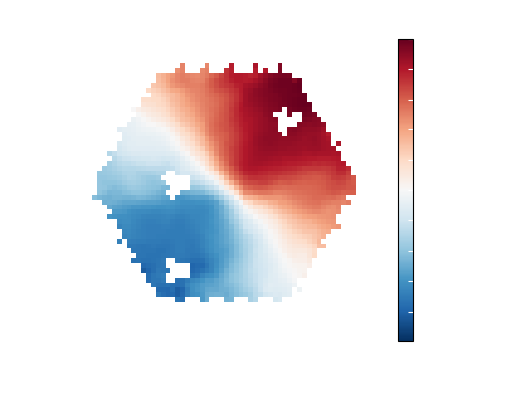

In [179]:
plot_vel(mHa_vel, 
             gal_ID, 
             V_type='Ha', 
             model=False,
             IMAGE_DIR=None, 
             FOLDER_NAME=None, 
             IMAGE_FORMAT='png', 
             FILENAME_SUFFIX=None, 
             ax=None)

In [180]:
def model_vel_map(params, map_shape, scale):
    '''
    Create a model velocity map of shape map_shape based on the values in params


    PARAMETERS
    ==========

    params : list
        List of fit parameters

    map_shape : tuple
        Shape of velocity map array

    scale : float
        Pixel scale (to convert from pixels to kpc)

    fit_function : string
        Determines which function to use for the velocity.  Options are 'BB' and
        'tanh'.


    RETURNS
    =======

    vel_map : numpy array of shape map_shape
        Model velocity map array
    '''


    ############################################################################
    # Unpack fit parameters
    #---------------------------------------------------------------------------
    
    v_sys, i_angle, i_center, j_center, phi, v_max, r_turn, alpha = params
    
    ############################################################################


    ############################################################################
    # Initialize velocity map
    #---------------------------------------------------------------------------
    vel_map = np.zeros(map_shape)

    v = np.zeros(map_shape)
    theta = np.zeros(map_shape)
    ############################################################################


    ############################################################################
    # Calculate velocity at each point in the velocity map
    #---------------------------------------------------------------------------
    center = (i_center, j_center)

    for i in range(map_shape[0]):
        for j in range(map_shape[1]):

            # De-projected radius for the current point
            r, theta[i,j] = deproject_spaxel((i,j), center, phi, i_angle)
            
            v[i,j] = rot_fit_BB(r*scale, [v_max, r_turn, alpha])
            

    #print([v_max, r_turn, alpha])
    #print(params)

    # Observed velocity at current point
    vel_map = v*np.sin(i_angle)*np.cos(theta) + v_sys
    ############################################################################

    return vel_map


In [182]:
cosi2 = (0.915**2 - 0.2**2)/(1 - 0.2**2)

if cosi2 < 0:
    cosi2 = 0.001
    #    inclination_angle_guess = np.arccos(np.sqrt(cosi2)) - 0.01
    #else: 
i_angle = np.arccos(np.sqrt(cosi2))

In [183]:
H_0 = 100      # Hubble's Constant in units of h km/s/Mpc
c = 299792.458 # Speed of light in units of km/s
G = 4.30091E-3 # Gravitation constant in units of (km/s)^2 pc/Msun

q0 = 0.2

MANGA_FIBER_DIAMETER = 2*(1/60)*(1/60)*(np.pi/180) # angular fiber diameter (2") in radians
MANGA_SPAXEL_SIZE = 0.5*(1/60)*(1/60)*(np.pi/180)  # spaxel size (0.5") in radians

dist_to_galaxy_Mpc = c*t['nsa_z'][0]/H_0
dist_to_galaxy_kpc = dist_to_galaxy_Mpc*1000

pix_scale_factor = dist_to_galaxy_kpc*np.tan(MANGA_SPAXEL_SIZE)

In [184]:
model = model_vel_map([9.89659208458773, i_angle, 30.9696, 31.2936, np.radians(317.9236), 322.914, 0.1025, 0.47315],
                      mHa_vel.shape,
                      pix_scale_factor)

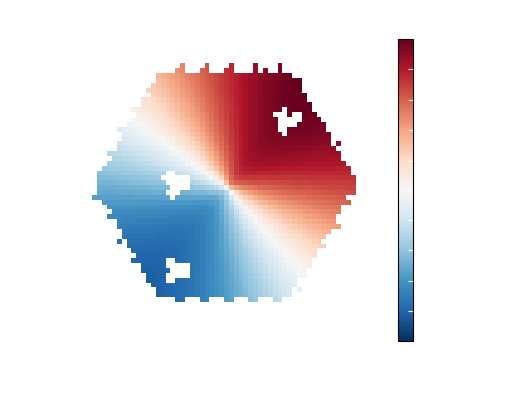

In [185]:
m_model = ma.array(model, mask=maps['Ha_vel_mask'])

plot_vel(m_model, 
             gal_ID, 
             V_type='Ha', 
             model=True,
             IMAGE_DIR=None, 
             FOLDER_NAME=None, 
             IMAGE_FORMAT='png', 
             FILENAME_SUFFIX=None, 
             ax=None)

In [155]:
m_model = ma.array(model, mask=maps['Ha_vel_mask'])
deproject_spaxel((32,15), (t['x0'], t['y0']), np.radians(t['phi']), i_angle)

(<MaskedColumn name='phi' dtype='float64' length=2>
 1.0921800787017888
  22.95093614887088, <MaskedColumn name='phi' dtype='float64' length=2>
 -0.016971679310616456
     3.094893645956598)

In [186]:
def deproject_spaxel(coords, center, phi, i_angle):
    '''
    Calculate the deprojected radius for the given coordinates in the map.


    PARAMETERS
    ==========

    coords : length-2 tuple
        (i,j) coordinates of the current spaxel

    center : length-2 tuple
        (i,j) coordinates of the galaxy's center

    phi : float
        Rotation angle (in radians) east of north of the semi-major axis.

    i_angle : float
        Inclination angle (in radians) of the galaxy.


    RETURNS
    =======

    r : float
        De-projected radius from the center of the galaxy for the given spaxel
        coordinates.
    '''


    # Distance components between center and current location
    delta = np.subtract(coords, center)


    # x-direction distance relative to the semi-major axis
    dx_prime = (delta[1]*np.cos(phi) + delta[0]*np.sin(phi))/np.cos(i_angle)

    # y-direction distance relative to the semi-major axis
    dy_prime = (-delta[1]*np.sin(phi) + delta[0]*np.cos(phi))


    # De-projected radius for the current point
    r = np.sqrt(dx_prime**2 + dy_prime**2)


    # Angle (counterclockwise) between North and current position
    theta = np.arctan2(-dx_prime, dy_prime)


    return r, theta

In [158]:
deproject_spaxel((32,15), (t['x0'], t['y0']), np.radians(t['phi']), i_angle)

coords (32, 15)
center (<MaskedColumn name='x0' dtype='float64' length=1>
31.20656083622686, <MaskedColumn name='y0' dtype='float64' length=1>
31.249468612477017)
phi        phi       
-----------------
5.542186473029883
i 0.20512602659614818
delta  [[  0.79343916 -16.20656084]
 [  0.75053139 -16.24946861]]
dx_prime         phi         
--------------------
0.018535240206661592
 -1.0713964268961924
dy_prime        phi        
------------------
1.0920227878499271
-22.92591502658034
r        phi        
------------------
1.0921800787017888
 22.95093614887088
theta          phi         
---------------------
-0.016971679310616456
    3.094893645956598


(<MaskedColumn name='phi' dtype='float64' length=2>
 1.0921800787017888
  22.95093614887088, <MaskedColumn name='phi' dtype='float64' length=2>
 -0.016971679310616456
     3.094893645956598)

In [159]:
t['v_sys'][0]

11.092780765805456

In [208]:
def plot_rot_curve(mvel,
                   mvel_ivar,
                   best_fit_values,
                   scale,
                   gal_ID,
                   fit_function,
                   IMAGE_DIR=None,
                   IMAGE_FORMAT='eps',
                   FILENAME_SUFFIX=None,
                   HESSIAN_DIR='',
                   ax=None):
    '''
    Plot the galaxy rotation curve.


    PARAMETERS
    ==========

    mvel : numpy ndarray of shape (n,n)
        Masked velocity array

    mvel_ivar : numpy ndarray of shape (n,n)
        Masked array of the inverse variance of the velocity measurements

    best_fit_values : dictionary
        Best-fit values for the velocity map

    scale : float
        Pixel scale (to convert from pixels to kpc)

    gal_ID : string
        MaNGA <plate>-<IFU> for the current galaxy

    fit_function : string
        Determines which function to use for the velocity.  Options are 'BB' and
        'tanh'.

    IMAGE_DIR : str
        Path of directory in which to store plot.

        Default is None (image will not be saved)

    IMAGE_FORMAT : str
        Format of saved plot

        Default is 'eps'

    FILENAME_SUFFIX : string
        Suffix to append to gal_ID to create image filename

        Default is None (no suffix added)

    HESSIAN_DIR : string
        Path to the Hessian directory.  Default is an empty string (so the
        directory is in the current working directory).

    ax : matplotlib.pyplot figure axis object
        Axis handle on which to create plot
    '''


    fig, ax = plt.subplots(figsize=(5,5))
    fig.patch.set_alpha(0)
    #fig.set_patch_alpha(0)

    ############################################################################
    # Convert axis ratio to angle of inclination
    #---------------------------------------------------------------------------
    cosi2 = (best_fit_values['ba']**2 - q0**2)/(1 - q0**2)

    if cosi2 < 0:
        cosi2 = 0

    i_angle = np.arccos(np.sqrt(cosi2))
    #i_angle = np.arccos(best_fit_values['ba'])
    ############################################################################


    ############################################################################
    # Convert rotation angle from degrees to radians
    #---------------------------------------------------------------------------
    phi = best_fit_values['phi']*np.pi/180
    ############################################################################


    ############################################################################
    # Deproject all data values in the given velocity map
    #---------------------------------------------------------------------------
    vel_array_shape = mvel.shape

    r_deproj = np.zeros(vel_array_shape)
    v_deproj = np.zeros(vel_array_shape)

    theta = np.zeros(vel_array_shape)

    for i in range(vel_array_shape[0]):
        for j in range(vel_array_shape[1]):

            r_deproj[i,j], theta[i,j] = deproject_spaxel((i,j),
                                                         (best_fit_values['x0'], best_fit_values['y0']),
                                                         phi,
                                                         i_angle)

            ####################################################################
            # Find the sign of r_deproj
            #-------------------------------------------------------------------
            if np.cos(theta[i,j]) < 0:
                r_deproj[i,j] *= -1
            ####################################################################

    # Scale radii to convert from spaxels to kpc
    r_deproj *= scale

    # Deproject velocity values
    v_deproj = (mvel - best_fit_values['v_sys'])/np.abs(np.cos(theta))
    v_deproj /= np.sin(i_angle)

    # Apply mask to arrays
    rm_deproj = ma.array(r_deproj, mask=mvel.mask)
    vm_deproj = ma.array(v_deproj, mask=mvel.mask)
    ############################################################################


    ############################################################################
    # Calculate functional form of rotation curve
    #---------------------------------------------------------------------------
    r = np.linspace(ma.min(rm_deproj), ma.max(rm_deproj), 100)
    v = np.zeros(len(r))


    if fit_function == 'BB':
        
        for i in range(0, len(r)):
            v[i] = rot_fit_BB(r[i], [best_fit_values['v_max'],
                           best_fit_values['r_turn'],
                           best_fit_values['alpha']])
        '''

        v = rot_fit_BB(r, [best_fit_values['v_max'],
                           best_fit_values['r_turn'],
                           best_fit_values['alpha']])
        '''
    #elif fit_function == 'tanh':
    #    v = rot_fit_tanh(r, [best_fit_values['v_max'],
    #                         best_fit_values['r_turn']])


    elif fit_function == 'tail':
        
        for i in range(0, len(r)):
            v[i] = rot_fit_tail(r[i], [best_fit_values['v_max'],
                           best_fit_values['r_turn'],
                           best_fit_values['alpha'],
                           best_fit_values['b']])
        ''' 
        v = rot_fit_tail(r, [best_fit_values['v_max'],
                           best_fit_values['r_turn'],
                           best_fit_values['alpha'],
                           best_fit_values['b']])  
        '''                     
                
    else:
        print('Fit function not known.  Please update plot_rot_curve function.')
    ############################################################################


    ############################################################################
    # Generate the uncertainty range of the best-fit
    #---------------------------------------------------------------------------
    #Hessian = np.load(HESSIAN_DIR + 'DRP_map_Hessians/' + gal_ID + '_Hessian.npy')
    #Hessian = np.load('/scratch/nravi3/Hessians/' + gal_ID + '_Hessian.npy')
    #Hessian = np.load('/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/' + gal_ID + '_Hessian.npy')
    Hessian = np.load('/Users/nityaravi/Documents/GitHub/RotationCurves/spirals/' + gal_ID + '_Hessian.npy')

    try:
        hess_inv = 2*np.linalg.inv(Hessian)
    
    except:
        print('Could not invert hessian\n', flush=True)
        return ma.max(ma.abs(rm_deproj))


    N_samples = 10000

    if fit_function=='BB':

        try:
            random_sample = np.random.multivariate_normal(mean=[best_fit_values['v_max'],
                                                        best_fit_values['r_turn'],
                                                        best_fit_values['alpha']],
                                                        cov=hess_inv[-3:,-3:],
                                                        size=N_samples)
        except:
            print('Could not produce samples for plot')
            return ma.max(ma.abs(rm_deproj))

    # Remove bad samples (those with negative values for any of the parameters)
        is_good_random = (random_sample[:,0] > 0) & (random_sample[:,1] > 0) & (random_sample[:,2] > 0)
        good_randoms = random_sample[is_good_random, :]
    
        y_sample = np.zeros((len(r), len(good_randoms[:,0])))

        for i in range(len(r)):
            
            for j in range(len(good_randoms[:,0])):
        # Calculate values of curve at this location
                y_sample[i][j] = rot_fit_BB(r[i], [good_randoms[:,0][j],
                                         good_randoms[:,1][j],
                                         good_randoms[:,2][j]])
            '''
            y_sample[i] = rot_fit_BB(r[i], [good_randoms[:,0],
                                         good_randoms[:,1],
                                         good_randoms[:,2]])
            '''

    if fit_function=='tail':
        try:
            random_sample = np.random.multivariate_normal(mean=[best_fit_values['v_max'],
                                                            best_fit_values['r_turn'],
                                                            best_fit_values['alpha'],
                                                            best_fit_values['b']],
                                                            cov=hess_inv[-4:,-4:],
                                                            size=N_samples)  
        except:
            print('Could not produce samples for plot')
            return ma.max(ma.abs(rm_deproj))
                            
        is_good_random = (random_sample[:,0] > 0) & (random_sample[:,1] > 0) & (random_sample[:,2] > 0) & (random_sample[:,3] > 0)
        good_randoms = random_sample[is_good_random, :]

        y_sample = np.zeros((len(r), len(good_randoms[:,0])))

        for i in range(len(r)):
            
            for j in range(len(good_randoms[:,0])):
                y_sample[i][j] = rot_fit_tail(r[i], [good_randoms[:,0][j],
                                         good_randoms[:,1][j],
                                         good_randoms[:,2][j],
                                         good_randoms[:,3][j]])
            '''
            y_sample[i] = rot_fit_tail(r[i], [good_randoms[:,0],
                                         good_randoms[:,1],
                                         good_randoms[:,2],
                                         good_randoms[:,3]])
            '''


    stdevs = np.nanstd(y_sample, axis=1)                                              

    ############################################################################


    ############################################################################
    # Plot rotation curve
    #---------------------------------------------------------------------------
    ax.set_title(gal_ID + ' rotation curve', fontsize=18, color='white')

    ax.plot(rm_deproj, vm_deproj, 'k.', markersize=1)

    ax.fill_between(r, v - stdevs, v + stdevs, facecolor='aliceblue')

    ax.plot(r, v, 'c')

    ax.set_ylim([-1.25*best_fit_values['v_max'], 1.25*best_fit_values['v_max']])
    ax.tick_params(axis='both', direction='in', labelsize=16, colors='white')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    #ax.set_xlabel('$r$ [kpc/h]')
    ax.set_xlabel('Deprojected radius [kpc/h]', fontsize=18, color='white') # plot formatting for paper
    #ax.set_ylabel('$v$ [km/s]')
    ax.set_ylabel('Rotational velocity [km/s]', fontsize=18, color='white') # plot formatting for paper
    ############################################################################
    plt.savefig('3.png')
    
    plt.show()
    
    return r_deproj, v_deproj


#     if IMAGE_DIR is not None:
#         ########################################################################
#         # Create output directory if it does not already exist
#         #-----------------------------------------------------------------------
#         #if not os.path.isdir(IMAGE_DIR + '/vel_map_rot_curve_' + fit_function):
#         #    os.makedirs(IMAGE_DIR + '/vel_map_rot_curve_' + fit_function)
#         ########################################################################

#         ########################################################################
#         # Save figure
#         #-----------------------------------------------------------------------
#         plt.savefig(IMAGE_DIR + '/vel_map_rot_curve_' + fit_function + '/' + gal_ID + '_rot_curve_' + fit_function + FILENAME_SUFFIX + '.' + IMAGE_FORMAT,
#                     format=IMAGE_FORMAT,bbox_inches = 'tight')
#         #plt.savefig('/Users/nityaravi/Documents/Research/RotationCurves/data/manga/PAPER_PLOTS/' + gal_ID + '_rot_curve_BB.eps')
#         ########################################################################

#         ########################################################################
#         # Figure cleanup
#         #-----------------------------------------------------------------------
#         plt.cla()
#         plt.clf()
#         plt.close()
#         gc.collect()
#         ########################################################################

#     return ma.max(ma.abs(rm_deproj))


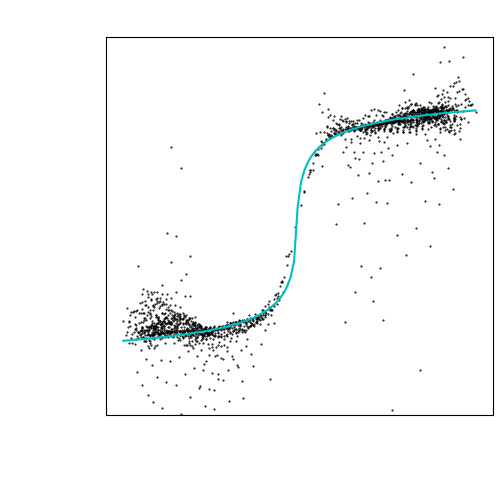

In [209]:
param_outputs = {'v_max':322.914,
                'r_turn': 0.1025,
                'alpha': 0.4731,
                'phi': 317.923,
                'v_sys':9.89659,
                'ba':0.91503,
                'x0':30.9696,
                'y0':31.2936}

r,v = plot_rot_curve(ma.array(maps['Ha_vel'], mask=maps['Ha_vel_mask']),
                ma.array(maps['Ha_vel_ivar'], mask=maps['Ha_vel_mask']),
                param_outputs,
                pix_scale_factor,
                gal_ID,
                fit_function='BB',
                #IMAGE_DIR=IMAGE_DIR,
                #IMAGE_FORMAT=IMAGE_FORMAT,
                #FILENAME_SUFFIX='_' + V_type
              )